### Data Load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

df = pd.read_csv("../data/diabetes.csv")

# Separar features (X) e target (y)
X = df.drop("Outcome", axis=1) 
y = df["Outcome"]

### Part A
### 1.

k=2, SSE=121.2579
k=3, SSE=105.9702
k=4, SSE=95.2363
k=5, SSE=88.5767
k=6, SSE=82.2146
k=7, SSE=78.2958
k=8, SSE=73.4088
k=9, SSE=71.4739
k=10, SSE=68.8528
k=11, SSE=65.6986


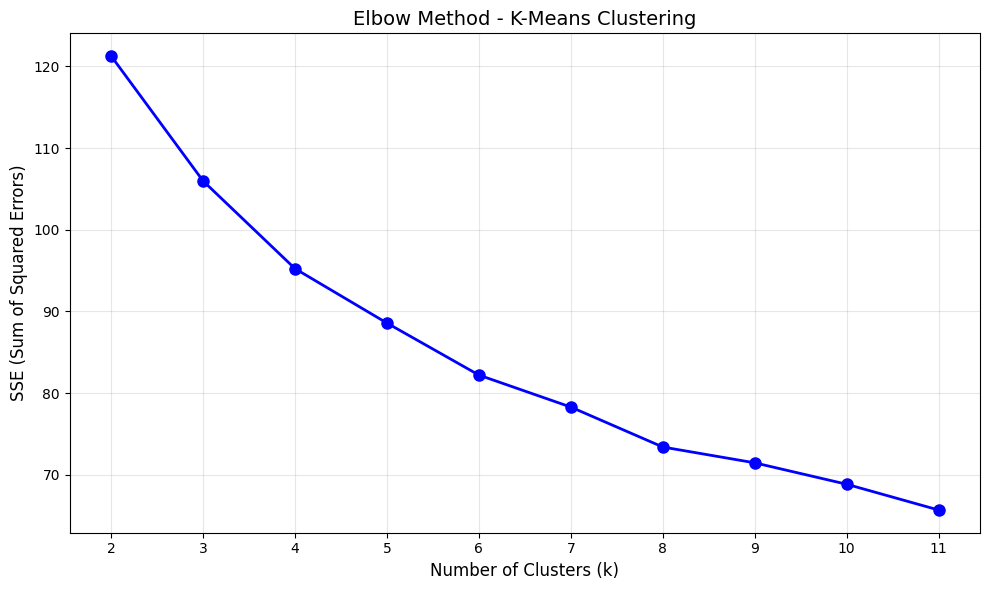

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means for k = 2 to 11
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
sse_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)
    print(f"k={k}, SSE={kmeans.inertia_:.4f}")

# Plot SSE vs number of clusters (Elbow Method)
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.title("Elbow Method - K-Means Clustering", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()  

### 2.  


In [ ]:
# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with k=6
kmeans = KMeans(n_clusters=6, max_iter=500, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Assign each cluster to the majority class
cluster_to_class = {}
for cluster_id in range(6):
    # Get all true labels for this cluster
    cluster_mask = cluster_labels == cluster_id
    cluster_true_labels = y[cluster_mask]

    # Find majority class
    majority_class = cluster_true_labels.mode()[0]
    cluster_to_class[cluster_id] = majority_class

    # Print cluster information
    class_0_count = (cluster_true_labels == 0).sum()
    class_1_count = (cluster_true_labels == 1).sum()
    print(
        f"Cluster {cluster_id}: Class 0={class_0_count}, Class 1={class_1_count}, "
        f"Majority Class={majority_class}"
    )

# Predict labels based on majority class of each cluster
y_pred = np.array([cluster_to_class[cluster] for cluster in cluster_labels])

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"True Negatives : {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives : {cm[1, 1]}\n")

# Compute metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Cluster 0: Class 0=61, Class 1=73, Majority Class=1
Cluster 1: Class 0=254, Class 1=26, Majority Class=0
Cluster 2: Class 0=43, Class 1=26, Majority Class=0
Cluster 3: Class 0=19, Class 1=16, Majority Class=0
Cluster 4: Class 0=74, Class 1=51, Majority Class=0
Cluster 5: Class 0=49, Class 1=76, Majority Class=1

Confusion Matrix:
[[390 110]
 [119 149]]
True Negatives : 390
False Positives: 110
False Negatives: 119
True Positives : 149

Accuracy:  0.7018
Precision: 0.5753
Recall:    0.5560
F1-Score:  0.5655


The k-means classification model with k=6 produced an accuracy of approximately 70.18%, with a precision of 57.53%, recall of 55.60%, and an F1-score of 56.55%. While the accuracy appears moderately acceptable, the relatively low precision, recall, and F1-score indicate that the model struggles to correctly distinguish between classes. This happens because clustering algorithms like k-means are unsupervised and do not use class labels during training, meaning the resulting clusters may not align well with the true class boundaries. Therefore, although clustering can reveal underlying data structures, it is not well-suited for classification tasks where the goal is accurate label prediction. In practice, supervised learning methods such as logistic regression or decision trees are more appropriate and typically yield better classification performance.


### 3.

In [20]:
# ============================================
# QUESTION 3: Class Distribution and Cluster Centers
# ============================================

# Print class distribution for each cluster
print("="*60)
print("CLASS DISTRIBUTION PER CLUSTER")
print("="*60)
for cluster_id in range(6):
    cluster_mask = cluster_labels == cluster_id
    cluster_true_labels = y[cluster_mask]
    
    class_0_count = (cluster_true_labels == 0).sum()
    class_1_count = (cluster_true_labels == 1).sum()
    total = class_0_count + class_1_count
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Total observations: {total}")
    print(f"  Class 0 (No Diabetes): {class_0_count} ({class_0_count/total*100:.1f}%)")
    print(f"  Class 1 (Diabetes):    {class_1_count} ({class_1_count/total*100:.1f}%)")
    print(f"  Majority class: {cluster_to_class[cluster_id]}")

# Print cluster centers (denormalized for interpretation)
print("\n" + "="*60)
print("CLUSTER CENTERS (Original Scale)")
print("="*60)

# Denormalize cluster centers
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
feature_names = X.columns

for cluster_id in range(6):
    print(f"\nCluster {cluster_id} Center:")
    for feature, value in zip(feature_names, cluster_centers_original[cluster_id]):
        print(f"  {feature}: {value:.2f}")

# # Identify the 3 most discriminative clusters
# print("\n" + "="*60)
# print("3 MOST DISCRIMINATIVE CLUSTERS")
# print("="*60)

# # Calculate purity for each cluster (how homogeneous it is)
# cluster_purity = {}
# for cluster_id in range(6):
#     cluster_mask = cluster_labels == cluster_id
#     cluster_true_labels = y[cluster_mask]
    
#     class_0_count = (cluster_true_labels == 0).sum()
#     class_1_count = (cluster_true_labels == 1).sum()
#     total = class_0_count + class_1_count
    
#     # Purity = proportion of majority class
#     purity = max(class_0_count, class_1_count) / total
#     cluster_purity[cluster_id] = purity

# # Sort clusters by purity (most discriminative = highest purity)
# sorted_clusters = sorted(cluster_purity.items(), key=lambda x: x[1], reverse=True)

# print("\nClusters ranked by discriminative power (purity):")
# for cluster_id, purity in sorted_clusters:
#     print(f"  Cluster {cluster_id}: {purity*100:.1f}% purity")

# print("\n" + "-"*60)
# print("INTERPRETATION OF TOP 3 DISCRIMINATIVE CLUSTERS:")
# print("-"*60)

# for i, (cluster_id, purity) in enumerate(sorted_clusters[:3], 1):
#     cluster_mask = cluster_labels == cluster_id
#     cluster_true_labels = y[cluster_mask]
    
#     class_0_count = (cluster_true_labels == 0).sum()
#     class_1_count = (cluster_true_labels == 1).sum()
#     majority_class = "Diabetes" if class_1_count > class_0_count else "No Diabetes"
    
#     print(f"\n{i}. Cluster {cluster_id} (Purity: {purity*100:.1f}%):")
#     print(f"   Majority class: {majority_class}")
#     print(f"   Key characteristics:")
    
#     center = cluster_centers_original[cluster_id]
#     for feature, value in zip(feature_names, center):
#         print(f"     - {feature}: {value:.2f}")

CLASS DISTRIBUTION PER CLUSTER

Cluster 0:
  Total observations: 134
  Class 0 (No Diabetes): 61 (45.5%)
  Class 1 (Diabetes):    73 (54.5%)
  Majority class: 1

Cluster 1:
  Total observations: 280
  Class 0 (No Diabetes): 254 (90.7%)
  Class 1 (Diabetes):    26 (9.3%)
  Majority class: 0

Cluster 2:
  Total observations: 69
  Class 0 (No Diabetes): 43 (62.3%)
  Class 1 (Diabetes):    26 (37.7%)
  Majority class: 0

Cluster 3:
  Total observations: 35
  Class 0 (No Diabetes): 19 (54.3%)
  Class 1 (Diabetes):    16 (45.7%)
  Majority class: 0

Cluster 4:
  Total observations: 125
  Class 0 (No Diabetes): 74 (59.2%)
  Class 1 (Diabetes):    51 (40.8%)
  Majority class: 0

Cluster 5:
  Total observations: 125
  Class 0 (No Diabetes): 49 (39.2%)
  Class 1 (Diabetes):    76 (60.8%)
  Majority class: 1

CLUSTER CENTERS (Original Scale)

Cluster 0 Center:
  Pregnancies: 1.88
  Glucose: 149.47
  BloodPressure: 74.47
  SkinThickness: 34.19
  Insulin: 209.57
  BMI: 37.07
  DiabetesPedigreeFunct